In [1]:
import tensorflow as tf
import sklearn 
import numpy as np
import matplotlib.pyplot as plt

# notebook for linear classification

breast cancer data - from course

primary tumor - my practice 


In [2]:
# load in the data

# the data in course is from sklearn
from sklearn.datasets import load_breast_cancer

# to code along, I'll use data from UCI ML
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/primary-tumor/primary-tumor.data

In [3]:
# load data (BC):
data = load_breast_cancer()

# check UCI data
#!head primary-tumor.data 
#import pandas as pd
#dff = pd.read_csv('primary-tumor.data', header=None)
#df = dff[[0,1,2,3,4,5]]
#df.columns = ['class', 'age', 'sex', 'histologic-type', 'degree-of-diffe', 'bone']
#print(df)

In [4]:
type(data)
# sklearn data is a "bunch" object, which acts like a dictionary
data.keys()

# data is a np array, so you can see shape 
# (number of samples, number of features) = (N, D)
data.data.shape

(569, 30)

In [5]:
# also look at targets
data.target

# only zeros and ones, so binary classification

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
# look at target names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# data.data returns a 2D array of numbers, so want to see feature names 
# i.e. what columns mean
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# now, do a train / test split
from sklearn.model_selection import train_test_split

# test size isn't required, but allows us to choose how much data
# goes to training & how much goes to testing 
X_train, X_test, Y_train, Y_test = train_test_split(
    data.data, data.target, test_size=0.33)

In [9]:
# get shape of X_train (should be N x D)
N, D = X_train.shape
N, D

(381, 30)

In [10]:
# now, preprocess the data by scaling it 
# this goes through every column in the dataset and give it 0 mean, std 1
# i.e standard normal distribution
from sklearn.preprocessing import StandardScaler 

# create standard scaler object
scaler = StandardScaler()

# call fit_transform for the training set
X_train = scaler.fit_transform(X_train)

# call transform only for the testing set
X_test = scaler.transform(X_test)

In [11]:
# now onto TF: make the model (see written notes)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# an alternative way (we wont do this)
# create a sequential model with nothing in it, and add layers / input shape later on
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [12]:
# now compile model, can specify optimizer (see written notes)
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']
              )

In [13]:
# train model
# note on validation data: for simplicity, this can be test set
# if you want to optimize your hyperparams, create a different validation set
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 0.7918 - accuracy: 0.5302 - val_loss: 0.8289 - val_accuracy: 0.4681
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7111 - accuracy: 0.6010 - val_loss: 0.7405 - val_accuracy: 0.5585
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.6772 - val_loss: 0.6647 - val_accuracy: 0.6436
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5793 - accuracy: 0.7244 - val_loss: 0.6007 - val_accuracy: 0.6915
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7769 - val_loss: 0.5475 - val_accuracy: 0.7287
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.8058 - val_loss: 0.5022 - val_accuracy: 0.8032
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8373 - val_loss: 0.4636 - val_accuracy: 0.8298
Epoch 8/100


In [14]:
# check the final score of the model
# model.evaluate returns an array of metrics [loss, accuracy]
print("train score: ", model.evaluate(X_train, Y_train))
print("test score: ", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9790
train score:  [0.09612389653921127, 0.9790025949478149]
6/6 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9787
test score:  [0.09504186362028122, 0.978723406791687]


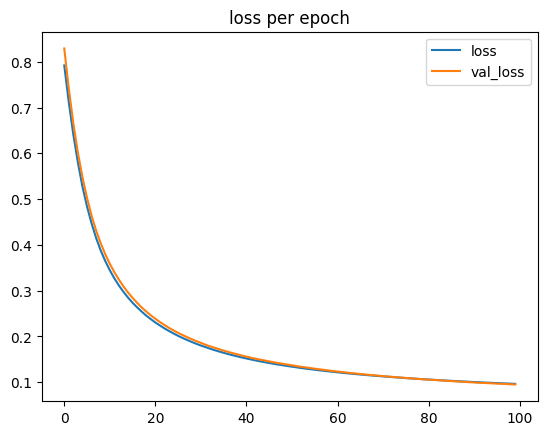

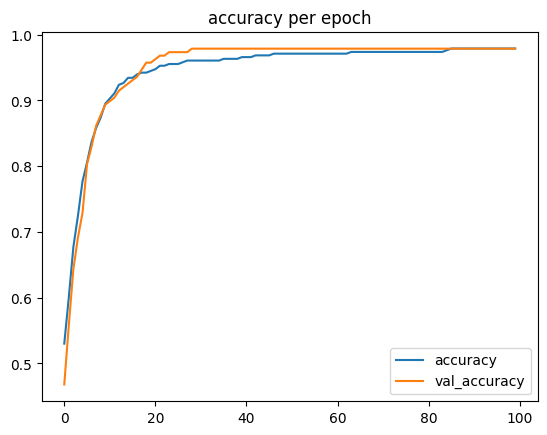

In [15]:
# now, plot loss / epoch and accuracy / epoch to see progress of training process
# this is contained in r.history

# loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.title('loss per epoch')
plt.show()

# accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('accuracy per epoch')
plt.show()

## part 2: making predictions 

In [16]:
# make predictions
# because we used sigmoid, model.predict will return probabilities p(y=1|x)
# therefore vals 0 to 1
p = model.predict(X_test)
print(p)

6/6 [==============================] - 0s 2ms/step
[[9.60873902e-01]
 [9.91824865e-01]
 [9.77914095e-01]
 [8.03486288e-01]
 [9.96731043e-01]
 [9.98806953e-01]
 [9.13169920e-01]
 [8.92551523e-03]
 [9.92484272e-01]
 [9.94261682e-01]
 [9.99210238e-01]
 [9.79286551e-01]
 [8.00392628e-01]
 [8.17654841e-03]
 [5.36882872e-05]
 [2.52446998e-03]
 [4.73417640e-01]
 [2.00365230e-01]
 [9.00181890e-01]
 [9.93858218e-01]
 [9.98407304e-01]
 [9.38376725e-01]
 [1.09374980e-02]
 [5.75005710e-01]
 [9.79941338e-02]
 [9.25422668e-01]
 [9.92281556e-01]
 [1.46600995e-02]
 [9.47242975e-01]
 [7.29393542e-01]
 [9.87559557e-01]
 [4.85834628e-02]
 [6.81339726e-02]
 [9.90803778e-01]
 [3.32982913e-02]
 [1.83910504e-01]
 [9.75960732e-01]
 [9.90491807e-01]
 [9.47253525e-01]
 [1.00327634e-05]
 [3.28682974e-04]
 [9.93817985e-01]
 [6.29988194e-01]
 [6.70831740e-01]
 [4.52989787e-01]
 [7.62489974e-01]
 [8.33144307e-01]
 [9.39766586e-01]
 [9.96994674e-01]
 [9.36669886e-01]
 [9.98956263e-01]
 [7.82658756e-01]
 [9.81063664e

In [17]:
# to get actual class predictions, need to round
# note: need to flatten predictions since targets are size (N,) and predictions are (N,1)
p = np.round(p).flatten()
print(p)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]


In [18]:
# now calculate the accuracy manually and compare it to the evaluate() output

# manually: use ==, this does an element-wise comparison and return an array of booleans
# true = 1, false = 0
print('manually calculated accuracy: ', np.mean(p == Y_test))

# now with evaluate function
print('evaluate function output: ', model.evaluate(X_test, Y_test))

manually calculated accuracy:  0.9787234042553191
6/6 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9787
evaluate function output:  [0.09504186362028122, 0.978723406791687]


## part 3: saving and loading a model

In [19]:
# to save the model to a file
model.save('linearClassifier.h5')

In [20]:
# check to see the model file exists: 
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Apr  3 21:14 linearClassifier.h5
drwxr-xr-x 1 root root 4.0K Mar 31 13:36 sample_data


In [21]:
# now we can try to load in the model and confirm it still works
model_reload = tf.keras.models.load_model('linearClassifier.h5')
print(model.layers)
model_reload.evaluate(X_test, Y_test)

# same accuracy - so its the same model!

6/6 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9787


[0.09504186362028122, 0.978723406791687]

In [22]:
# to save to the machine instead of the local directory in colab: 
# option 1: click the folder button on the left side menu, and click download
# option 2: use a python script
from google.colab import files
files.download('linearClassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>